In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("advertising.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Linear Regression

In [5]:
# Assumption Checking

In [6]:
'''
1. Linearity - independant columns and dependant columns should be having linear relation ( check by scatter plot )
2. No-multi colinearity - if independant cols are related among each other, drop irrelevant cols ( check by confusion matrix)
3. Auto correlation - if the current value of a specefic column is dependant on the previous value from the same column
4. No outliers - check by Boxplot
5. No Null Values - No null values should be present
6. char - numbers - NA

Check that all conditions are met before proceeding with the Linear Regression application to the the Dataset

'''

'\n1. Linearity - independant columns and dependant columns should be having linear relation ( check by scatter plot )\n2. No-multi colinearity - if independant cols are related among each other, drop irrelevant cols ( check by confusion matrix)\n3. Auto correlation - if the current value of a specefic column is dependant on the previous value from the same column\n4. No outliers - check by Boxplot\n5. No Null Values - No null values should be present\n6. char - numbers - NA\n\nCheck that all conditions are met before proceeding with the Linear Regression application to the the Dataset\n\n'

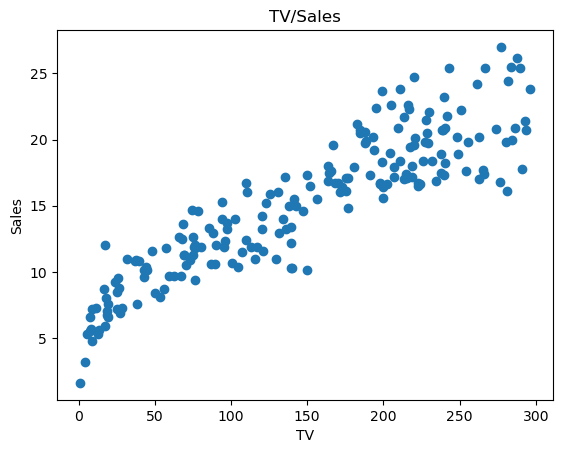

In [7]:
# 1. Linearity

col_a = data['TV']
col_b = data['Sales']

plt.xlabel("TV")
plt.ylabel('Sales')
plt.title('TV/Sales')

plt.scatter(col_a, col_b)

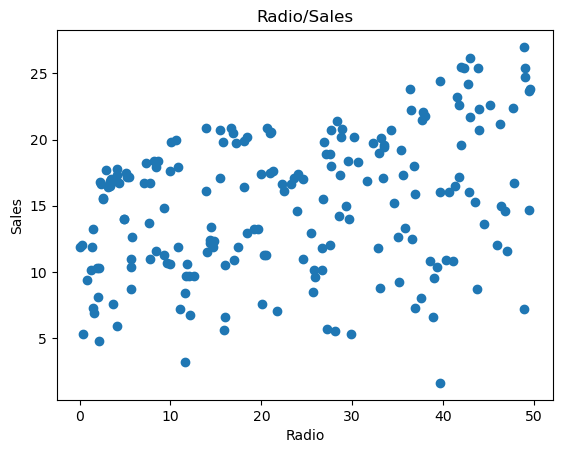

In [8]:
col_a = data['Radio']
col_b = data['Sales']

plt.xlabel("Radio")
plt.ylabel('Sales')
plt.title('Radio/Sales')

plt.scatter(col_a, col_b)

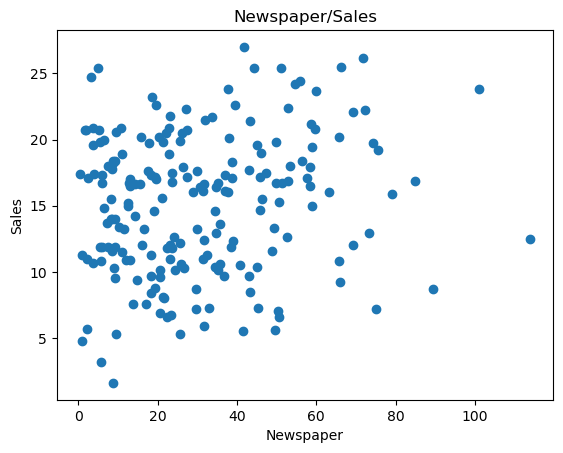

In [9]:
col_a = data['Newspaper']
col_b = data['Sales']

plt.xlabel("Newspaper")
plt.ylabel('Sales')
plt.title('Newspaper/Sales')

plt.scatter(col_a, col_b)

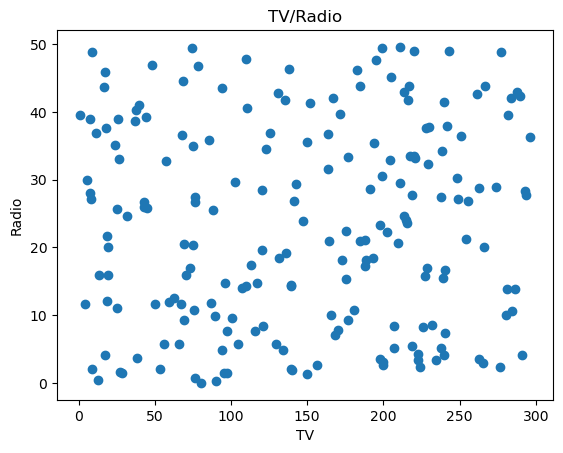

In [10]:
# No Multicolinearity

col_a = data['TV']
col_b = data['Radio']

plt.xlabel("TV")
plt.ylabel('Radio')
plt.title('TV/Radio')

plt.scatter(col_a, col_b)

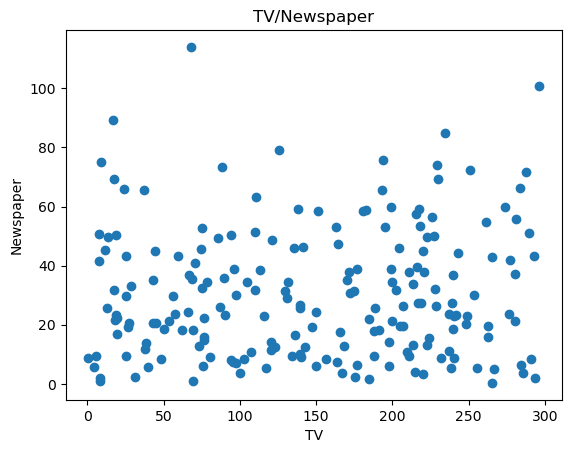

In [11]:
col_a = data['TV']
col_b = data['Newspaper']

plt.xlabel("TV")
plt.ylabel('Newspaper')
plt.title('TV/Newspaper')

plt.scatter(col_a, col_b)

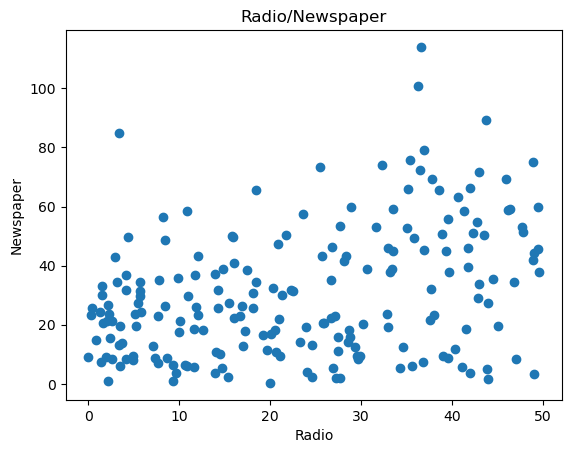

In [12]:
col_a = data['Radio']
col_b = data['Newspaper']

plt.xlabel("Radio")
plt.ylabel('Newspaper')
plt.title('Radio/Newspaper')

plt.scatter(col_a, col_b)

<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

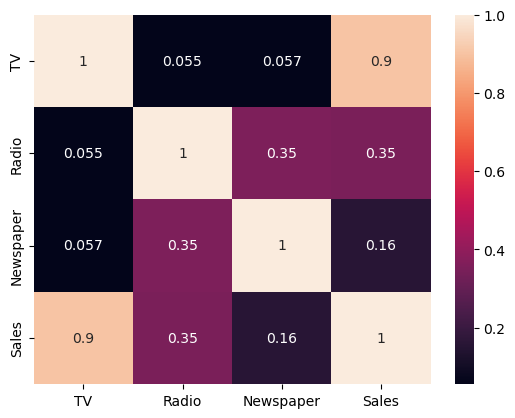

In [13]:
sns.heatmap(data.corr(), annot = True)
sns.heatmap

In [14]:
# Any value which has value > 0.1 is said to be correlated! Less than 0.1 are not correlated!

# Value greater than -0.1 and Less than +0.1, There is no correlation!

{'whiskers': [<matplotlib.lines.Line2D at 0x201b4828d50>,
 'caps': [<matplotlib.lines.Line2D at 0x201b512b490>,
 'boxes': [<matplotlib.lines.Line2D at 0x201b4662950>],
 'medians': [<matplotlib.lines.Line2D at 0x201b5138a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x201b5139490>],
 'means': []}

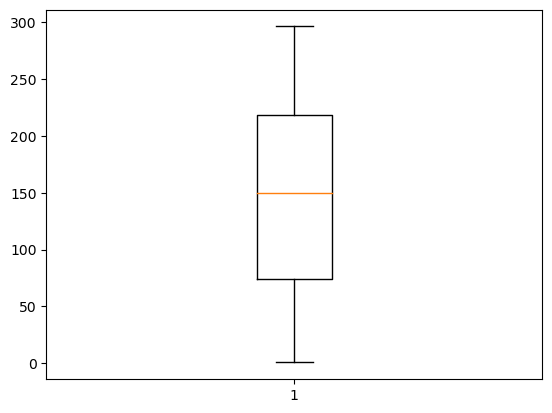

In [15]:
plt.boxplot(data['TV'])

{'whiskers': [<matplotlib.lines.Line2D at 0x201b5192190>,
 'caps': [<matplotlib.lines.Line2D at 0x201b51937d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x201b5191650>],
 'medians': [<matplotlib.lines.Line2D at 0x201b51a4d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x201b516d810>],
 'means': []}

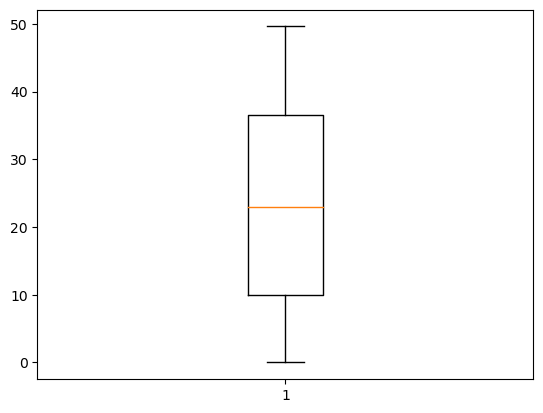

In [16]:
plt.boxplot(data['Radio'])

{'whiskers': [<matplotlib.lines.Line2D at 0x201b5209310>,
 'caps': [<matplotlib.lines.Line2D at 0x201b520abd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x201b5208650>],
 'medians': [<matplotlib.lines.Line2D at 0x201b5210190>],
 'fliers': [<matplotlib.lines.Line2D at 0x201b51d5790>],
 'means': []}

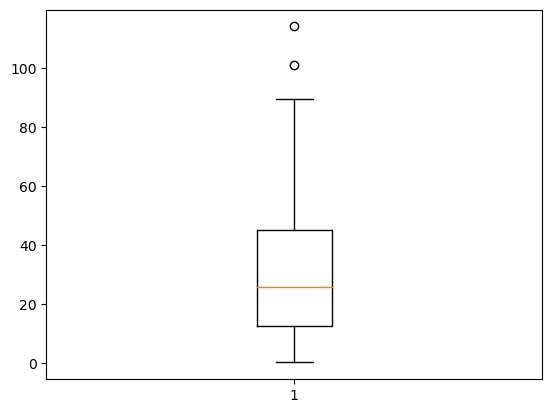

In [17]:
plt.boxplot(data['Newspaper'])

{'whiskers': [<matplotlib.lines.Line2D at 0x201b5268710>,
 'caps': [<matplotlib.lines.Line2D at 0x201b5269f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x201b524c710>],
 'medians': [<matplotlib.lines.Line2D at 0x201b526b510>],
 'fliers': [<matplotlib.lines.Line2D at 0x201b526bf90>],
 'means': []}

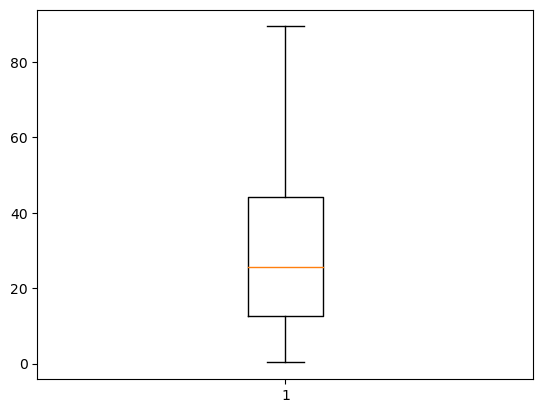

In [18]:
data1 = data[data['Newspaper'] < 90]
plt.boxplot(data1['Newspaper'])

In [19]:
data1.isnull().sum()

# If 30 % values are null inside any column, use mean median and mode, else drop the column if it has more tan 30% values which are null

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [20]:
data1.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [21]:
# Linear regression

'''
Beta - b

Y = b0 + b1x1 + b2x2 + b3x3 + .... + bnxn

sales = b0 + b1 * "TV" + b2 * "Radio" + b3 * "Newspaper"

For 1st ROW;

22.1 = b0 + b1 * 230.1 + b2 * 37.8 + b3 * 69.2

b1, b2 and b3 are the actual importance depicted by TV, Radio and Newspaper on the Sales ###

While b0 shows that there must be some value of Y (that is sales) even if X (that is TV, Radio or Newspaper is 0)


'''

'\nBeta - b\n\nY = b0 + b1x1 + b2x2 + b3x3 + .... + bnxn\n\nsales = b0 + b1 * "TV" + b2 * "Radio" + b3 * "Newspaper"\n\nFor 1st ROW;\n\n22.1 = b0 + b1 * 230.1 + b2 * 37.8 + b3 * 69.2\n\nb1, b2 and b3 are the actual importance depicted by TV, Radio and Newspaper on the Sales ###\n\nWhile b0 shows that there must be some value of Y (that is sales) even if X (that is TV, Radio or Newspaper is 0)\n\n\n'

Best fit Line

In [22]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [25]:
x = data[['TV','Radio','Newspaper']] # double brackets required as there are multiple Variables
y = data[['Sales']]
display(x)
print(y)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


     Sales
0     22.1
1     10.4
2     12.0
3     16.5
4     17.9
..     ...
195    7.6
196   14.0
197   14.8
198   25.5
199   18.4

[200 rows x 1 columns]


In [24]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [29]:
# z = data['Sales']
# z

In [30]:
data.shape

(200, 4)

In [31]:
x.shape

(200, 3)

In [32]:
y.shape

(200, 1)

In [33]:
m = data1[['TV','Radio','Newspaper']] # double brackets required as there are multiple Variables
n = data1[['Sales']]
display(m)
print(n)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


     Sales
0     22.1
1     10.4
2     12.0
3     16.5
4     17.9
..     ...
195    7.6
196   14.0
197   14.8
198   25.5
199   18.4

[198 rows x 1 columns]


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2) # Keeping 20 - 30 % of dataset for testing

In [36]:
print(x_train.shape)
print(x_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)

(160, 1)
(40, 1)


In [37]:
from sklearn.model_selection import train_test_split
m_train, m_test, n_train, n_test = train_test_split(m,n, test_size = 0.3) # Keeping 20 - 30 % of dataset for testing

In [38]:
print(m_train.shape)
print(m_test.shape)
print()
print(n_train.shape)
print(n_test.shape)

(138, 3)
(60, 3)

(138, 1)
(60, 1)


In [39]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [40]:
lm.fit(x_train, y_train)

LinearRegression()

y = b0 + b1x1 + b2x2 + b3x3

In [45]:
print(lm.coef_)

[[ 0.05454645  0.10692646 -0.00051286]]


In [46]:
print(lm.intercept_)

[4.61448856]


In [47]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [48]:
x1 = 230.1
x2 = 37.8
x3 = 69.2

y = 4.61448856 + (0.05454645*x1)+(0.10692646*x2)+(-0.00051286*x3)

In [49]:
y

21.171956981

In [50]:
y_pred = lm.predict(x_test)

In [51]:
y_pred

array([[11.4244181 ],
       [19.24170716],
       [13.26078074],
       [16.81327865],
       [ 9.8844738 ],
       [21.3970969 ],
       [ 9.49581223],
       [ 6.91631641],
       [15.82659555],
       [ 7.73560119],
       [20.72052427],
       [12.08781463],
       [19.94126616],
       [ 9.1750872 ],
       [ 7.37207625],
       [13.75801091],
       [24.91332474],
       [10.4293316 ],
       [ 7.00919468],
       [20.90517943],
       [12.11992076],
       [20.96738466],
       [ 6.07555263],
       [ 9.56566691],
       [16.42446119],
       [15.76408292],
       [19.39332596],
       [20.49865087],
       [ 8.82777095],
       [15.60134086],
       [19.48501754],
       [19.31081207],
       [13.09180234],
       [ 8.85978789],
       [ 5.3076207 ],
       [10.87577519],
       [ 8.27424779],
       [ 7.99607886],
       [16.5835962 ],
       [24.16952867]])

In [52]:
new_df = pd.DataFrame()
new_df = x_test
new_df['actual sales']= y_test
new_df['predicted sales']= y_pred
new_df


,TV,Radio,Newspaper,actual sales,predicted sales
144,96.2,14.8,38.9,12.3,11.424418
14,204.1,32.9,46.0,19.0,19.241707
7,120.2,19.6,11.6,13.2,13.260781
162,188.4,18.1,25.6,19.9,16.813279
191,75.5,10.8,6.0,11.9,9.884474
58,210.8,49.6,37.7,23.8,21.397097
49,66.9,11.7,36.8,9.7,9.495812
189,18.7,12.1,23.4,6.7,6.916316
50,199.8,3.1,34.6,16.4,15.826596
60,53.5,2.0,21.4,8.1,7.735601


In [53]:
lm.score(x_train,y_train)*100

89.69580033724284

In [55]:
# lm.score(x_test, y_test)*100

In [60]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

R-squared: 0.9161285976896378
RMSE: 1.6584308243573647


How to save a machine learningmodel which has already been trained and tested and provided me the accuracy!

In [56]:
# import joblib


In [59]:
# joblib.dump(lm, 'model.pkl')



In [1]:
# In Linear Regression Machine Learning Algorithm;

# Input is the training data and output is the b0 value and b1 to bn values

# What is Best Fit Line?
# --> 

In [ ]:
'''
Reading the Data
Data Preprocessing
EDA
Splitting the Data into x and y
Linear Regression Model selection
lm.predict is used to prdict the output
Evaluation done through checking R^2 and RMSE
'''
